In [1]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

import pandas as pd
# from pycaret.datasets import get_data
# dataset = get_data('diamond')
# dataset.to_csv('diamonds.csv', index=False)
MODEL = 'Final_best_Model'

dataset=pd.read_csv('diamonds.csv')

TARGET = 'Price'
EXPERIMENT = "abc-3"
SESSION = 123

ignore = []

data = dataset.sample(frac=0.9, random_state=SESSION)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

# 自动获取分类列（对象类型），并排除 target
categoricals = data.select_dtypes(include=['object', 'category']).columns.tolist()
categoricals = [col for col in categoricals if col != TARGET]

# 自动获取数值列，并排除 target
numericals = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numericals = [col for col in numericals if col != TARGET]

# 如果使用了 ignore 列表，也一并移除
for col in ignore:
    if col in categoricals:
        categoricals.remove(col)
    if col in numericals:
        numericals.remove(col)

print("分类变量:", categoricals)
print("数值变量:", numericals)
data.tail()

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)
分类变量: ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']
数值变量: ['Carat Weight']


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5395,1.07,Ideal,F,VVS1,VG,EX,GIA,9530
5396,0.80,Ideal,E,SI1,ID,ID,AGSL,3663
5397,1.13,Signature-Ideal,G,SI1,ID,ID,AGSL,6970
5398,1.53,Ideal,G,SI1,ID,ID,AGSL,10842
5399,1.29,Ideal,G,VVS1,EX,EX,GIA,11470


In [2]:
# from pycaret.regression import *
# exp_reg = setup(data=data, target=TARGET, session_id=SESSION, log_experiment=True, experiment_name=EXPERIMENT)

from pycaret.regression import *
exp = RegressionExperiment()
exp.setup(data=data, target=TARGET, session_id=SESSION, log_experiment=True, experiment_name=EXPERIMENT)

best = exp.compare_models()
# best = create_model('catboost')

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 29)"
5,Transformed train set shape,"(3779, 29)"
6,Transformed test set shape,"(1621, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


2025/12/24 06:54:39 INFO mlflow.tracking.fluent: Experiment with name 'abc-3' does not exist. Creating a new experiment.
2025/12/24 06:54:39 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,633.2506,1869786.3508,1330.7756,0.9821,0.0658,0.0488,0.0550
xgboost,Extreme Gradient Boosting,702.1935,2041868.7143,1407.0782,0.9805,0.0717,0.0540,0.0340
et,Extra Trees Regressor,757.9822,2272752.7440,1476.2494,0.9783,0.0798,0.0600,0.0430
rf,Random Forest Regressor,763.2111,2656471.5245,1582.1941,0.9747,0.0793,0.0592,0.0390
gbr,Gradient Boosting Regressor,941.2766,3516252.3516,1844.8599,0.9664,0.1026,0.0782,0.0340
lightgbm,Light Gradient Boosting Machine,780.8216,3561540.8550,1834.3033,0.9660,0.0788,0.0569,0.0540
dt,Decision Tree Regressor,980.8632,4869725.6269,2151.9240,0.9530,0.1046,0.0761,0.0340
ridge,Ridge Regression,2416.2896,14233904.3458,3757.7832,0.8622,0.6110,0.2797,0.0780
lasso,Lasso Regression,2411.9718,14248229.7782,3757.7641,0.8620,0.6103,0.2788,0.1070
llar,Lasso Least Angle Regression,2411.9918,14248213.4799,3757.7623,0.8620,0.6103,0.2788,0.0340


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [3]:
tuned = exp.tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,602.2182,1333416.2368,1154.7364,0.9849,0.0685,0.0524
1,599.0152,1065335.6002,1032.1510,0.9885,0.0736,0.0542
2,797.2480,2621579.9878,1619.1294,0.9777,0.0852,0.0635
3,640.9425,1253957.8781,1119.8026,0.9875,0.0802,0.0578
4,848.0741,5379373.9677,2319.3477,0.9485,0.0870,0.0634
5,794.2078,3080985.2086,1755.2735,0.9746,0.0785,0.0598
6,756.7830,3022390.4543,1738.5024,0.9707,0.0853,0.0660
7,656.2015,2814870.3916,1677.7575,0.9696,0.0736,0.0561
8,733.5359,1818148.7935,1348.3875,0.9824,0.0779,0.0583


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


| 参数值                 | 图表类型      | 说明                  |
| ------------------- | --------- | ------------------- |
| **`'residuals'`**   | 残差图       | 显示预测值与实际值的残差分布      |
| **`'error'`**       | 预测误差图     | 实际值 vs 预测值散点图       |
| **`'cooks'`**       | Cook's 距离 | 识别异常值（影响点）          |
| **`'feature'`**     | 特征重要性     | Top N 重要特征（默认 N=10） |
| **`'feature_all'`** | 所有特征重要性   | 显示所有特征的重要性          |
| **`'parameter'`**   | 超参数图      | 显示关键超参数对性能的影响       |
| **`'learning'`**    | 学习曲线      | 训练/验证误差随样本数变化       |
| **`'vc'`**          | 验证曲线      | 验证误差随超参数变化          |
| **`'rfe'`**         | 递归特征消除    | 特征数量 vs 模型性能        |
| **`'manifold'`**    | 流形学习      | 高维数据降维可视化（2D/3D）    |
| **`'tsne'`**        | t-SNE 图   | t-分布随机邻域嵌入          |
| **`'umap'`**        | UMAP 图    | 统一流形逼近与投影           |
| **`'calibration'`** | 校准曲线      | 模型预测概率校准（部分模型）      |
| **`'dimension'`**   | 降维图       | PCA/ICA 等降维方法比较     |


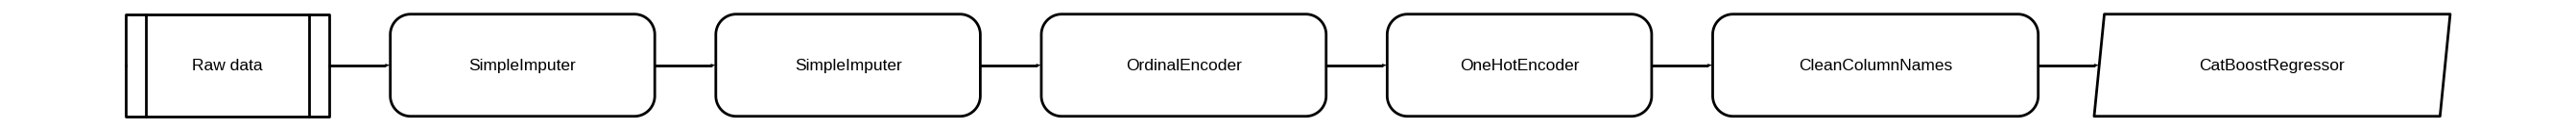

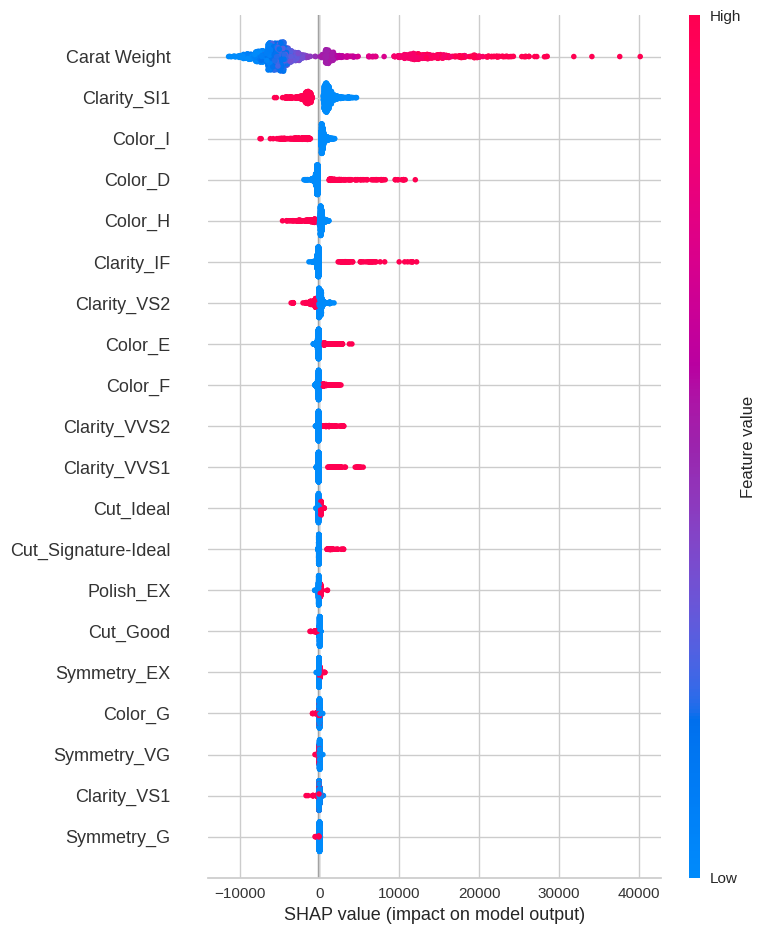

In [7]:
exp.plot_model(tuned, plot='feature')
exp.evaluate_model(best)
exp.interpret_model(tuned)

In [14]:
predictions = exp.predict_model(tuned)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,584.1966,1245330.9424,1115.9440,0.9887,0.0655,0.0481


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
3172,0.90,Good,H,VS2,VG,VG,GIA,4027,3772.481225
658,1.05,Ideal,G,IF,EX,EX,GIA,9514,9625.855830
3180,2.26,Ideal,G,VS1,EX,EX,GIA,35742,31771.834630
1340,1.21,Ideal,F,VS1,VG,EX,GIA,9746,9857.991524
586,1.01,Fair,E,SI1,VG,VG,GIA,5085,5027.266001
...,...,...,...,...,...,...,...,...,...
790,0.90,Ideal,E,SI1,EX,VG,GIA,5450,4468.297353
4934,1.08,Ideal,I,SI1,EX,EX,GIA,4639,4943.401415
469,1.51,Ideal,G,VS2,VG,VG,GIA,14196,12790.490689
2061,2.02,Ideal,G,VS1,VG,EX,GIA,26970,27232.612949


In [12]:
exp.save_model(tuned, MODEL)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry', 'Report'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(in...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',


In [13]:
unseen_predictions = exp.predict_model(tuned, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,528.5838,878850.6939,937.4704,0.9902,0.0606,0.0454


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.50,Very Good,F,SI1,VG,VG,GIA,11004,11014.444708
1,1.52,Ideal,D,VS1,EX,EX,GIA,17659,17285.460323
2,1.28,Very Good,I,VS1,EX,VG,GIA,6726,6982.799347
3,2.04,Very Good,D,VVS1,VG,VG,GIA,41867,49063.024756
4,0.77,Signature-Ideal,F,SI1,EX,EX,GIA,3321,3460.244703
...,...,...,...,...,...,...,...,...,...
595,1.04,Ideal,H,SI1,EX,EX,GIA,5469,5360.186503
596,2.12,Ideal,F,VS2,ID,ID,AGSL,26078,29635.777369
597,0.90,Good,H,SI1,VG,VG,GIA,3577,3500.559028
598,0.90,Very Good,G,SI1,EX,VG,GIA,4320,3880.402758


In [15]:
from pycaret.regression import *
exp2 = RegressionExperiment()

exp2.setup(data=data, target=TARGET, session_id=SESSION)

my_saved_model = exp2.load_model(MODEL)
exp2.predict_model(my_saved_model, data=data_unseen)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 29)"
5,Transformed train set shape,"(3779, 29)"
6,Transformed test set shape,"(1621, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,528.5838,878850.6939,937.4704,0.9902,0.0606,0.0454


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.50,Very Good,F,SI1,VG,VG,GIA,11004,11014.444708
1,1.52,Ideal,D,VS1,EX,EX,GIA,17659,17285.460323
2,1.28,Very Good,I,VS1,EX,VG,GIA,6726,6982.799347
3,2.04,Very Good,D,VVS1,VG,VG,GIA,41867,49063.024756
4,0.77,Signature-Ideal,F,SI1,EX,EX,GIA,3321,3460.244703
...,...,...,...,...,...,...,...,...,...
595,1.04,Ideal,H,SI1,EX,EX,GIA,5469,5360.186503
596,2.12,Ideal,F,VS2,ID,ID,AGSL,26078,29635.777369
597,0.90,Good,H,SI1,VG,VG,GIA,3577,3500.559028
598,0.90,Very Good,G,SI1,EX,VG,GIA,4320,3880.402758


In [16]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")

from mlflow.tracking import MlflowClient

client = MlflowClient()

run_id = None
# 列出模型所有版本
for mv in client.get_latest_versions("xyz"):
    print(f"Version: {mv.version}, Stage: {mv.current_stage}, Run ID: {mv.run_id}")
    
    run_id = mv.run_id


Version: 5, Stage: None, Run ID: 7ce821e5666d415f8a720599c7cbb9bc


In [17]:
import mlflow.pyfunc
import pandas as pd

# 使用 Run ID 加载模型
# run_id = "1139ccb5e7804ab1a1ad5cee87fa9777"
model_uri = f"runs:/{run_id}/model"  # "model" 是默认模型保存路径
model = mlflow.pyfunc.load_model(model_uri)

# 做预测
predictions = model.predict(data_unseen)
print(predictions)

[11014.44470824 17285.4603228   6982.79934668 49063.02475569
  3460.24470299  4240.68509176 10474.44257411  5520.82175857
  8634.60430685  6890.10232038  5560.52616046  7146.2259293
  6104.80948291  5464.03704678 10664.54174028  5558.78747305
  6279.74621444  4036.45118897  5800.88462755 22592.40355852
  8743.3826448   9357.20388684  6483.21348526 12820.98001435
  3443.29179826 19230.59366252 10310.70012128  4308.89943318
 17348.28525199  7152.40508498  8580.66179084  8948.7461487
  7427.16032244  7604.51368605  7022.18964951 15019.93622094
  5213.55034652 27047.42055353  6182.86172479  5367.96147034
 13344.34529413 11710.83843195 10575.16923839  3517.64290191
  3745.63978459  9238.41014167 10027.99407068 11010.54672447
  3143.097334    6368.84310434 10708.99422361 31792.62778407
  5131.61679158 37494.07419032 30721.75795836  6433.58280519
  5878.35635385  9084.25177833  3032.08281672 10976.14466795
  6152.30772449  7996.77582791  8505.57439499  9820.96332864
  5198.13325011  7778.3901